<a href="https://colab.research.google.com/github/nisha1365/precisionFDA/blob/main/Transformers_HistGBC_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
sample_df = pd.read_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/nisha-gpu3/code/Users/900379/Final_data_frames/Sample_train_30K.csv')
sample_df

,Unnamed: 0,Internalpatientid,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death
0,112422,143813,"69_Dental caries on smooth surface,69_Dental c...","68_TD (ADULT), 2 LF TETANUS TOXOID, PRESERVATI...","69_WBC_9.69,69_Hct_36.51,69_MPV_8.67,69_PLT_19...",69.0,120.0,7.0,86.0,18.0,93.482373,1
1,37897,48430,"76_Low back pain,76_Cervicalgia,76_Other stres...","75_COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/...","75_A1c_8.24,75_AST_12.0,75_A/G RATIO_1.0,75_PO...",63.0,89.0,9.0,95.0,21.0,99.936185,0
2,17169,21949,85_Problem related to unspecified psychosocial...,"84_INFLUENZA, INJECTABLE, QUADRIVALENT, PRESER...","84_Mcv_88.08,84_CBC COMPLETED_Y,84_NUCLEATED R...",75.0,154.0,0.0,78.0,16.0,99.815148,1
3,71014,90695,74_Type 2 diabetes mellitus with neurological ...,"71_FLU,3 YRS (HISTORICAL),71_INFLUENZA, UNSPEC...","73_LDL (CALC.)_27.0,73_SODIUM (LAB USE ONLY)_1...",79.0,112.0,1.0,1.0,1.0,1.000000,1
4,108915,139292,"93_Sleep apnea,93_Presence of cardiac pacemake...","92_INFLUENZA, HIGH DOSE SEASONAL","93_ABSOLUTE LYMPHOCYTE COUNT_1.7,93_RDW_15.27,...",79.0,134.0,0.0,61.0,16.0,98.868134,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,111856,143087,69_Long term (current) use of anticoagulants a...,"68_INFLUENZA, UNSPECIFIED FORMULATION,68_INFLU...",69_INR_1.03,74.0,113.0,0.0,93.0,20.0,92.916039,1
29996,65325,83441,85_Other specified counseling,"85_INFLUENZA, UNSPECIFIED FORMULATION","85_CHLORIDE (FV)_86.0,85_TOTAL BILIRUBIN (FV)_...",62.0,140.0,3.0,66.0,20.0,100.179957,1
29997,128669,164680,"58_Alcohol dependence,58_Alcohol dependence,58...","57_INFLUENZA, UNSPECIFIED FORMULATION","57_TOTAL PROTEIN (URINE)*_7.82,57_ALBUMIN *_4....",99.0,170.0,0.0,107.0,21.0,96.000000,1
29998,13864,17711,65_Encounter for immunization,"65_COVID-19 (MODERNA), MRNA, LNP-S, PF, 100 MC...","63_HEPATITIS B SURFACE ANTIBODY, QUANT_6.63,63...",81.0,160.0,0.0,77.0,18.0,101.672149,1


In [ ]:
sample_df.drop('Unnamed: 0', axis = 1, inplace = True)
sample_df.head()

,Internalpatientid,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death
0,143813,"69_Dental caries on smooth surface,69_Dental c...","68_TD (ADULT), 2 LF TETANUS TOXOID, PRESERVATI...","69_WBC_9.69,69_Hct_36.51,69_MPV_8.67,69_PLT_19...",69.0,120.0,7.0,86.0,18.0,93.482373,1
1,48430,"76_Low back pain,76_Cervicalgia,76_Other stres...","75_COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/...","75_A1c_8.24,75_AST_12.0,75_A/G RATIO_1.0,75_PO...",63.0,89.0,9.0,95.0,21.0,99.936185,0
2,21949,85_Problem related to unspecified psychosocial...,"84_INFLUENZA, INJECTABLE, QUADRIVALENT, PRESER...","84_Mcv_88.08,84_CBC COMPLETED_Y,84_NUCLEATED R...",75.0,154.0,0.0,78.0,16.0,99.815148,1
3,90695,74_Type 2 diabetes mellitus with neurological ...,"71_FLU,3 YRS (HISTORICAL),71_INFLUENZA, UNSPEC...","73_LDL (CALC.)_27.0,73_SODIUM (LAB USE ONLY)_1...",79.0,112.0,1.0,1.0,1.0,1.000000,1
4,139292,"93_Sleep apnea,93_Presence of cardiac pacemake...","92_INFLUENZA, HIGH DOSE SEASONAL","93_ABSOLUTE LYMPHOCYTE COUNT_1.7,93_RDW_15.27,...",79.0,134.0,0.0,61.0,16.0,98.868134,1


In [ ]:
df_train_text = sample_df[['Condition_code_icd10_subcategory', 'Lab_test_description_Result', 'immunization']]
df_train_num = sample_df[['Pain', 'Pulse', 'Respiratory rate', 'Temperature', 'Diastolic bp', 'Systolic bp']]
target_train = sample_df[['death']]

In [ ]:
target_train['death'].value_counts()

1    21984
0     8016
Name: death, dtype: int64

In [ ]:
df_train_text

,Condition_code_icd10_subcategory,Lab_test_description_Result,immunization
0,"69_Dental caries on smooth surface,69_Dental c...","69_WBC_9.69,69_Hct_36.51,69_MPV_8.67,69_PLT_19...","68_TD (ADULT), 2 LF TETANUS TOXOID, PRESERVATI..."
1,"76_Low back pain,76_Cervicalgia,76_Other stres...","75_A1c_8.24,75_AST_12.0,75_A/G RATIO_1.0,75_PO...","75_COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/..."
2,85_Problem related to unspecified psychosocial...,"84_Mcv_88.08,84_CBC COMPLETED_Y,84_NUCLEATED R...","84_INFLUENZA, INJECTABLE, QUADRIVALENT, PRESER..."
3,74_Type 2 diabetes mellitus with neurological ...,"73_LDL (CALC.)_27.0,73_SODIUM (LAB USE ONLY)_1...","71_FLU,3 YRS (HISTORICAL),71_INFLUENZA, UNSPEC..."
4,"93_Sleep apnea,93_Presence of cardiac pacemake...","93_ABSOLUTE LYMPHOCYTE COUNT_1.7,93_RDW_15.27,...","92_INFLUENZA, HIGH DOSE SEASONAL"
...,...,...,...
29995,69_Long term (current) use of anticoagulants a...,69_INR_1.03,"68_INFLUENZA, UNSPECIFIED FORMULATION,68_INFLU..."
29996,85_Other specified counseling,"85_CHLORIDE (FV)_86.0,85_TOTAL BILIRUBIN (FV)_...","85_INFLUENZA, UNSPECIFIED FORMULATION"
29997,"58_Alcohol dependence,58_Alcohol dependence,58...","57_TOTAL PROTEIN (URINE)*_7.82,57_ALBUMIN *_4....","57_INFLUENZA, UNSPECIFIED FORMULATION"
29998,65_Encounter for immunization,"63_HEPATITIS B SURFACE ANTIBODY, QUANT_6.63,63...","65_COVID-19 (MODERNA), MRNA, LNP-S, PF, 100 MC..."


In [ ]:
pip install sentence-transformers

  Using cached sentence-transformers-2.2.2.tar.gz (85 kB)
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125919 sha256=bb0c15885b15b0ee3cb5307015344ee36f095c29ea3308aa51421adcd6ca959e
  Stored in directory: /home/azureuser/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sentence_transformers import SentenceTransformer

model_name = 'paraphrase-MiniLM-L6-v2'
model = SentenceTransformer(model_name)

In [ ]:
# Define the desired vector size
vector_size = 25  # Change this to your desired size

# Define a padding function
def pad_or_truncate(embeddings, vector_size):
    num_embeddings = len(embeddings)
    if num_embeddings < vector_size:
        # Pad the embeddings with zero vectors
        padding = np.zeros((vector_size - num_embeddings, embeddings.shape[1]))
        embeddings = np.concatenate((embeddings, padding))
    elif num_embeddings > vector_size:
        # Truncate the embeddings
        embeddings = embeddings[:vector_size]
    return embeddings

# Define a function to get embeddings for comma-separated text
def get_embeddings(text, model):
    # Split the comma-separated text into individual items
    items = text.split(',')
    # Get embeddings for each item using the Sentence Transformer model
    embeddings = model.encode(items)
    # Pad or truncate the embeddings to ensure consistent size
    embeddings = pad_or_truncate(embeddings, vector_size)
    # Return the embeddings as a list
    return embeddings.tolist()

# Assuming df_train_text is your DataFrame with the 'condition', 'lab', and 'immunization' columns

# Apply the function to the 'condition' column
df_train_text['condition_embeddings'] = df_train_text['Condition_code_icd10_subcategory'].apply(lambda x: get_embeddings(x,model))

# Apply the function to the 'lab' column
df_train_text['lab_embeddings'] = df_train_text['Lab_test_description_Result'].apply(lambda x: get_embeddings(x,model))

# Apply the function to the 'immunization' column
df_train_text['immunization_embeddings'] = df_train_text['immunization'].apply(lambda x: get_embeddings(x,model))

# Now you have three new columns in the DataFrame, each containing the word embeddings for the respective comma-separated text,
# with the vectors having the same size of `vector_size`.
# You can save this DataFrame or use it for further analysis.

/tmp/ipykernel_39960/506314678.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_text['condition_embeddings'] = df_train_text['Condition_code_icd10_subcategory'].apply(lambda x: get_embeddings(x,model))
/tmp/ipykernel_39960/506314678.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_text['lab_embeddings'] = df_train_text['Lab_test_description_Result'].apply(lambda x: get_embeddings(x,model))
/tmp/ipykernel_39960/506314678.py:36: SettingWithCopyWarning: 
A value is trying to be set on

In [ ]:
# Save the model for each column seperatly
condition_model = SentenceTransformer(model_name)
condition_model.save("condition_model")

lab_model = SentenceTransformer(model_name)
lab_model.save("lab_model")

immunization_model = SentenceTransformer(model_name)
immunization_model.save("immunization_model")

In [ ]:
df_train_text

,Condition_code_icd10_subcategory,Lab_test_description_Result,immunization,condition_embeddings,lab_embeddings,immunization_embeddings
0,"69_Dental caries on smooth surface,69_Dental c...","69_WBC_9.69,69_Hct_36.51,69_MPV_8.67,69_PLT_19...","68_TD (ADULT), 2 LF TETANUS TOXOID, PRESERVATI...","[[-0.21708104014396667, 0.03796498849987984, 0...","[[-0.6257778406143188, 0.8007684946060181, -0....","[[0.1913083791732788, 0.055047109723091125, 0...."
1,"76_Low back pain,76_Cervicalgia,76_Other stres...","75_A1c_8.24,75_AST_12.0,75_A/G RATIO_1.0,75_PO...","75_COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/...","[[-0.04970243200659752, 0.11041482537984848, 0...","[[-0.14167293906211853, 0.7223513722419739, -0...","[[-0.20271024107933044, -0.033898599445819855,..."
2,85_Problem related to unspecified psychosocial...,"84_Mcv_88.08,84_CBC COMPLETED_Y,84_NUCLEATED R...","84_INFLUENZA, INJECTABLE, QUADRIVALENT, PRESER...","[[0.6252766251564026, 0.04844518378376961, 0.4...","[[-0.47003641724586487, 0.5753830075263977, -0...","[[-0.18550683557987213, 0.6562936902046204, -0..."
3,74_Type 2 diabetes mellitus with neurological ...,"73_LDL (CALC.)_27.0,73_SODIUM (LAB USE ONLY)_1...","71_FLU,3 YRS (HISTORICAL),71_INFLUENZA, UNSPEC...","[[0.008645305410027504, 0.3546537160873413, -0...","[[-0.5125254392623901, 0.1042684018611908, -0....","[[-0.06549470126628876, 0.1921929121017456, -0..."
4,"93_Sleep apnea,93_Presence of cardiac pacemake...","93_ABSOLUTE LYMPHOCYTE COUNT_1.7,93_RDW_15.27,...","92_INFLUENZA, HIGH DOSE SEASONAL","[[0.1178533062338829, -0.12091274559497833, 0....","[[0.11260022968053818, 0.01711287908256054, 0....","[[-0.31085139513015747, 0.6327782273292542, -0..."
...,...,...,...,...,...,...
29995,69_Long term (current) use of anticoagulants a...,69_INR_1.03,"68_INFLUENZA, UNSPECIFIED FORMULATION,68_INFLU...","[[-0.6363993287086487, 0.1632065623998642, 0.0...","[[-0.39120781421661377, 0.17473061382770538, -...","[[-0.21500973403453827, 0.7048530578613281, -0..."
29996,85_Other specified counseling,"85_CHLORIDE (FV)_86.0,85_TOTAL BILIRUBIN (FV)_...","85_INFLUENZA, UNSPECIFIED FORMULATION","[[0.2826520502567291, 0.14784608781337738, 0.1...","[[-0.23238526284694672, 0.6080105900764465, -0...","[[0.020157674327492714, 0.6216462254524231, -0..."
29997,"58_Alcohol dependence,58_Alcohol dependence,58...","57_TOTAL PROTEIN (URINE)*_7.82,57_ALBUMIN *_4....","57_INFLUENZA, UNSPECIFIED FORMULATION","[[0.030693212524056435, 0.18372924625873566, 0...","[[-0.021385665982961655, 0.07671085745096207, ...","[[-0.07106530666351318, 0.5603832006454468, -0..."
29998,65_Encounter for immunization,"63_HEPATITIS B SURFACE ANTIBODY, QUANT_6.63,63...","65_COVID-19 (MODERNA), MRNA, LNP-S, PF, 100 MC...","[[-0.38614755868911743, 0.6568415760993958, 0....","[[-0.3651110529899597, 0.1857205480337143, -0....","[[-0.36554667353630066, 0.20162393152713776, -..."


In [ ]:
df_train_text.drop(['Condition_code_icd10_subcategory','Lab_test_description_Result','immunization'], axis = 1, inplace=True)
df_train_text

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,condition_embeddings,lab_embeddings,immunization_embeddings
0,"[[-0.21708104014396667, 0.03796498849987984, 0...","[[-0.6257778406143188, 0.8007684946060181, -0....","[[0.1913083791732788, 0.055047109723091125, 0...."
1,"[[-0.04970243200659752, 0.11041482537984848, 0...","[[-0.14167293906211853, 0.7223513722419739, -0...","[[-0.20271024107933044, -0.033898599445819855,..."
2,"[[0.6252766251564026, 0.04844518378376961, 0.4...","[[-0.47003641724586487, 0.5753830075263977, -0...","[[-0.18550683557987213, 0.6562936902046204, -0..."
3,"[[0.008645305410027504, 0.3546537160873413, -0...","[[-0.5125254392623901, 0.1042684018611908, -0....","[[-0.06549470126628876, 0.1921929121017456, -0..."
4,"[[0.1178533062338829, -0.12091274559497833, 0....","[[0.11260022968053818, 0.01711287908256054, 0....","[[-0.31085139513015747, 0.6327782273292542, -0..."
...,...,...,...
29995,"[[-0.6363993287086487, 0.1632065623998642, 0.0...","[[-0.39120781421661377, 0.17473061382770538, -...","[[-0.21500973403453827, 0.7048530578613281, -0..."
29996,"[[0.2826520502567291, 0.14784608781337738, 0.1...","[[-0.23238526284694672, 0.6080105900764465, -0...","[[0.020157674327492714, 0.6216462254524231, -0..."
29997,"[[0.030693212524056435, 0.18372924625873566, 0...","[[-0.021385665982961655, 0.07671085745096207, ...","[[-0.07106530666351318, 0.5603832006454468, -0..."
29998,"[[-0.38614755868911743, 0.6568415760993958, 0....","[[-0.3651110529899597, 0.1857205480337143, -0....","[[-0.36554667353630066, 0.20162393152713776, -..."


In [ ]:
df_train_text['condition_embeddings'].iloc[0][0]

[-0.21708104014396667,
 0.03796498849987984,
 0.027890676632523537,
 0.026605388149619102,
 -0.6357978582382202,
 0.05181480571627617,
 -0.05071750283241272,
 0.40406543016433716,
 -0.1778538078069687,
 -0.23510107398033142,
 -0.3821970820426941,
 0.023508453741669655,
 0.15535488724708557,
 0.29758161306381226,
 -0.15003721415996552,
 -0.23255690932273865,
 0.19087843596935272,
 0.3369009792804718,
 0.02436969242990017,
 0.4191008508205414,
 0.14915910363197327,
 0.022186756134033203,
 -0.3433443009853363,
 -0.23296883702278137,
 0.1716795265674591,
 0.1153641939163208,
 -0.34537914395332336,
 0.14285261929035187,
 0.39010733366012573,
 0.09360846132040024,
 -0.17672213912010193,
 0.24787120521068573,
 0.982832133769989,
 -0.7353166341781616,
 0.46780315041542053,
 -0.5387336015701294,
 -0.3386891186237335,
 -0.6744917631149292,
 0.4154077470302582,
 -0.007425052113831043,
 -0.4070691466331482,
 0.1532440483570099,
 -0.21261635422706604,
 0.2474946528673172,
 0.5919739007949829,
 0.24

In [ ]:
len(df_train_text['lab_embeddings'].iloc[0][4])

384

In [ ]:
empty_counts =df_train_text.applymap(lambda x: len(x) == 0).sum()
empty_counts

condition_embeddings       0
lab_embeddings             0
immunization_embeddings    0
dtype: int64

In [ ]:
mean_vectors_condition = []
mean_vectors_lab_test = []
mean_vectors_immunization = []

for index, row in df_train_text.iterrows():
    condition_vectors = row['condition_embeddings']
    lab_test_vectors = row['lab_embeddings']
    immunization_vectors = row['immunization_embeddings']

    # Calculate the mean vector for each column
    mean_vector_condition = np.mean(condition_vectors, axis=0)
    mean_vector_lab_test = np.mean(lab_test_vectors, axis=0)
    mean_vector_immunization = np.mean(immunization_vectors, axis=0)

    # Append the mean vectors to the respective lists
    mean_vectors_condition.append(mean_vector_condition)
    mean_vectors_lab_test.append(mean_vector_lab_test)
    mean_vectors_immunization.append(mean_vector_immunization)

# Create a DataFrame for the mean vectors
mean_vectors_df_train = pd.DataFrame({
    'Condition_code_icd10_subcategory': mean_vectors_condition,
    'Lab_test_description_Result': mean_vectors_lab_test,
    'immunization': mean_vectors_immunization
})

In [ ]:
mean_vectors_df_train

,Condition_code_icd10_subcategory,Lab_test_description_Result,immunization
0,"[-0.017366483211517333, 0.003037199079990387, ...","[-0.47930544465780256, 0.38803591281175615, -0...","[-0.049707164764404295, 0.01936510369181633, -..."
1,"[0.004204686433076858, 0.007342205941677093, 0...","[-0.18428385078907014, 0.3341594913601875, -0....","[-0.05648137897253037, -0.01219500869512558, -..."
2,"[0.025011065006256102, 0.0019378073513507843, ...","[-0.3306388858705759, 0.350494344048202, 0.083...","[-0.08037377297878265, 0.03318602859973908, -0..."
3,"[-0.032162702530622485, 0.09579411633312702, 0...","[-0.2941217628493905, 0.40902471750974656, 0.0...","[-0.02249548614025116, 0.0620588743686676, -0...."
4,"[-0.0952738507091999, 0.0065325327962636945, 0...","[-0.3392115433514118, 0.3505941965803504, -0.0...","[-0.009101245403289795, 0.019963232278823854, ..."
...,...,...,...
29995,"[-0.025455973148345946, 0.006528262495994568, ...","[-0.01564831256866455, 0.006989224553108215, -...","[-0.04609080970287323, 0.06953858733177185, -0..."
29996,"[0.011306082010269164, 0.005913843512535095, 0...","[-0.1495333231985569, 0.4501739479601383, 0.01...","[-0.024177201613783835, 0.03381288170814514, -..."
29997,"[0.004910914003849029, 0.029396679401397705, 0...","[-0.24483009554445745, 0.3080739136040211, 0.0...","[-0.027826120853424074, 0.03136236071586609, -..."
29998,"[-0.015445902347564697, 0.02627366304397583, 0...","[-0.054646440744400025, 0.033910083770751956, ...","[-0.05201736569404602, -0.003939645290374756, ..."


In [ ]:
# Create a new DataFrame to store the split vectors
df1_train_split = pd.DataFrame()

# Iterate over each column
for column in ['Condition_code_icd10_subcategory', 'Lab_test_description_Result', 'immunization']:
    # Expand the column into separate columns for each vector value
    expanded_columns = mean_vectors_df_train[column].apply(lambda x: pd.Series(x) if len(x) > 0 else pd.Series([0] * vector_size))

    # Rename the expanded columns to have meaningful names
    expanded_columns = expanded_columns.rename(columns=lambda x: f'{column}_{x+1}')

    # Concatenate the expanded columns with the new DataFrame
    df1_train_split = pd.concat([df1_train_split, expanded_columns], axis=1)


In [ ]:
df1_train_split

,Condition_code_icd10_subcategory_1,Condition_code_icd10_subcategory_2,Condition_code_icd10_subcategory_3,Condition_code_icd10_subcategory_4,Condition_code_icd10_subcategory_5,Condition_code_icd10_subcategory_6,Condition_code_icd10_subcategory_7,Condition_code_icd10_subcategory_8,Condition_code_icd10_subcategory_9,Condition_code_icd10_subcategory_10,...,immunization_375,immunization_376,immunization_377,immunization_378,immunization_379,immunization_380,immunization_381,immunization_382,immunization_383,immunization_384
0,-0.017366,0.003037,0.002231,0.002128,-0.050864,0.004145,-0.004057,0.032325,-0.014228,-0.018808,...,-0.021174,-0.036378,0.015020,0.015844,0.007156,0.026650,-0.044259,0.005946,0.094992,0.010534
1,0.004205,0.007342,0.034012,-0.010250,-0.061574,-0.061187,-0.037517,0.033733,0.001891,0.005912,...,-0.043684,-0.029666,-0.053432,0.023058,-0.020576,-0.035878,0.031517,0.033349,0.104835,-0.076060
2,0.025011,0.001938,0.019945,0.003415,-0.005157,0.005085,0.027793,-0.008179,0.004094,0.012151,...,-0.033776,-0.008194,-0.006383,-0.004473,0.035922,0.022184,-0.004948,0.005042,0.075084,0.011393
3,-0.032163,0.095794,0.044017,0.070280,0.064118,-0.032749,-0.017461,0.106380,0.035805,-0.050519,...,-0.049147,-0.044210,-0.009355,-0.002766,0.016037,-0.032093,0.045791,-0.009878,0.012744,0.008077
4,-0.095274,0.006533,0.027504,0.016621,-0.050905,0.073470,-0.088379,0.142815,0.072036,-0.068763,...,-0.052315,-0.026243,0.003003,-0.012672,0.023148,-0.026685,0.004231,-0.030956,-0.043704,0.017414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.025456,0.006528,0.000404,-0.000488,0.001541,-0.004563,-0.005807,0.019124,-0.016453,-0.003226,...,-0.077013,-0.039435,-0.004185,-0.028569,0.039703,-0.028372,0.031778,0.000088,0.007788,0.021906
29996,0.011306,0.005914,0.004154,0.012038,-0.009262,0.025867,0.003533,0.000154,0.009271,0.014961,...,-0.038567,-0.009912,-0.004851,-0.005398,0.018763,-0.011120,0.025785,-0.002486,0.022058,0.017961
29997,0.004911,0.029397,0.045820,0.092142,0.028850,0.083012,0.102367,0.058000,-0.072349,-0.010240,...,-0.042241,-0.007046,-0.007558,-0.004535,0.018564,-0.007613,0.039152,-0.006917,0.023072,0.021335
29998,-0.015446,0.026274,0.011866,-0.008752,-0.009355,0.003647,0.035259,-0.003794,-0.009217,0.010590,...,-0.052505,-0.021005,-0.045039,0.033169,-0.012997,-0.027775,0.032945,0.030401,0.099312,-0.062291


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_df_train = pd.DataFrame(scaler.fit_transform(df_train_num), columns=df_train_num.columns)

In [ ]:
num_df_train

,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp
0,1.883792,0.505296,-0.046615,-0.107612,-0.027003,-0.197402
1,2.595485,0.945192,0.718815,0.303917,-0.480465,-1.501723
2,-0.607133,0.114277,-0.556901,0.296199,0.426459,1.233144
3,-0.251287,-3.649279,-4.384047,-6.004774,0.728767,-0.534001
4,-0.607133,-0.716638,-0.556901,0.235812,0.728767,0.391647
...,...,...,...,...,...,...
29995,-0.607133,0.847437,0.463672,-0.143725,0.350882,-0.491926
29996,0.460406,-0.472251,0.463672,0.319461,-0.556041,0.644096
29997,-0.607133,1.531720,0.718815,0.052925,2.240305,1.906342
29998,-0.607133,0.065400,-0.046615,0.414611,0.879920,1.485594


In [ ]:
whole_train = pd.concat([df1_train_split, num_df_train], axis=1)

# Display the concatenated dataframe
whole_train

,Condition_code_icd10_subcategory_1,Condition_code_icd10_subcategory_2,Condition_code_icd10_subcategory_3,Condition_code_icd10_subcategory_4,Condition_code_icd10_subcategory_5,Condition_code_icd10_subcategory_6,Condition_code_icd10_subcategory_7,Condition_code_icd10_subcategory_8,Condition_code_icd10_subcategory_9,Condition_code_icd10_subcategory_10,...,immunization_381,immunization_382,immunization_383,immunization_384,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp
0,-0.017366,0.003037,0.002231,0.002128,-0.050864,0.004145,-0.004057,0.032325,-0.014228,-0.018808,...,-0.044259,0.005946,0.094992,0.010534,1.883792,0.505296,-0.046615,-0.107612,-0.027003,-0.197402
1,0.004205,0.007342,0.034012,-0.010250,-0.061574,-0.061187,-0.037517,0.033733,0.001891,0.005912,...,0.031517,0.033349,0.104835,-0.076060,2.595485,0.945192,0.718815,0.303917,-0.480465,-1.501723
2,0.025011,0.001938,0.019945,0.003415,-0.005157,0.005085,0.027793,-0.008179,0.004094,0.012151,...,-0.004948,0.005042,0.075084,0.011393,-0.607133,0.114277,-0.556901,0.296199,0.426459,1.233144
3,-0.032163,0.095794,0.044017,0.070280,0.064118,-0.032749,-0.017461,0.106380,0.035805,-0.050519,...,0.045791,-0.009878,0.012744,0.008077,-0.251287,-3.649279,-4.384047,-6.004774,0.728767,-0.534001
4,-0.095274,0.006533,0.027504,0.016621,-0.050905,0.073470,-0.088379,0.142815,0.072036,-0.068763,...,0.004231,-0.030956,-0.043704,0.017414,-0.607133,-0.716638,-0.556901,0.235812,0.728767,0.391647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.025456,0.006528,0.000404,-0.000488,0.001541,-0.004563,-0.005807,0.019124,-0.016453,-0.003226,...,0.031778,0.000088,0.007788,0.021906,-0.607133,0.847437,0.463672,-0.143725,0.350882,-0.491926
29996,0.011306,0.005914,0.004154,0.012038,-0.009262,0.025867,0.003533,0.000154,0.009271,0.014961,...,0.025785,-0.002486,0.022058,0.017961,0.460406,-0.472251,0.463672,0.319461,-0.556041,0.644096
29997,0.004911,0.029397,0.045820,0.092142,0.028850,0.083012,0.102367,0.058000,-0.072349,-0.010240,...,0.039152,-0.006917,0.023072,0.021335,-0.607133,1.531720,0.718815,0.052925,2.240305,1.906342
29998,-0.015446,0.026274,0.011866,-0.008752,-0.009355,0.003647,0.035259,-0.003794,-0.009217,0.010590,...,0.032945,0.030401,0.099312,-0.062291,-0.607133,0.065400,-0.046615,0.414611,0.879920,1.485594


## **Training data is Done**

In [ ]:
test_df = pd.read_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/nisha-gpu3/code/Users/900379/Final_data_frames/Whole_df_test.csv')
test_df

,Unnamed: 0,Internalpatientid,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death
0,0,6,88_Other specified counseling,"88_FLU,3 YRS (HISTORICAL)","88_FINGERSTICK INR (COAGUCHEK)_2.57,88_FINGERS...",67.0,126.0,0.0,51.0,16.0,97.030389,1.0
1,1,7,74_Dental caries on smooth surface,"73_INFLUENZA, INJECTABLE, QUADRIVALENT, PRESER...","74_RBC_4.79,74_ABS MONOCYTE_0.71,74_BASOPHIL %...",72.0,116.0,0.0,67.0,19.0,97.567325,0.0
2,2,9,52_Hypertensive heart disease with heart failu...,positive/negative,"52_Bands_3.0,52_RDW_21.2*,52_ZZZAUTO ANISO_++,...",52.0,105.0,0.0,91.0,21.0,98.600910,1.0
3,3,12,"74_Polyosteoarthritis, unspecified ; Osteoarth...","71_FLU,3 YRS (HISTORICAL)","74_LDL-CHOL CALCULATION_69.74,74_SODIUM (blood...",67.0,104.0,3.0,64.0,24.0,97.693046,1.0
4,4,17,"82_Encounter for other specified aftercare,82_...","82_INFLUENZA (HISTORICAL),82_INFLUENZA, WHOLE","82_HCO3-_12.0,82_ICTERUS INDEX_2.0,82_SODIUM_1...",61.0,86.0,0.0,63.0,25.0,101.122904,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34808,34808,64432,positive/negative,positive/negative,"71_CK/CPK_25.0,71_IONIZED CALCIUM (dc'd 022321...",50.0,132.0,0.0,41.0,25.0,99.396176,1.0
34809,34809,106205,positive/negative,positive/negative,"79_B2 GLYCOPROTEIN I (IGM)AB_3.72,79_B2 GLYCOP...",69.0,132.0,0.0,114.0,23.0,102.395419,1.0
34810,34810,138129,positive/negative,positive/negative,"54_PROCALCITONIN (PCT)_7.08,54_LDH_9582.0,54_L...",64.0,84.0,0.0,94.0,29.0,93.109955,1.0
34811,34811,145401,positive/negative,positive/negative,75_MRSA SURVL NARES AGAR_Negative,56.0,103.0,4.0,77.0,20.0,100.525257,1.0


In [ ]:
test_df.drop('Unnamed: 0', axis = 1, inplace=True)
test_df.head()

,Internalpatientid,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death
0,6,88_Other specified counseling,"88_FLU,3 YRS (HISTORICAL)","88_FINGERSTICK INR (COAGUCHEK)_2.57,88_FINGERS...",67.0,126.0,0.0,51.0,16.0,97.030389,1.0
1,7,74_Dental caries on smooth surface,"73_INFLUENZA, INJECTABLE, QUADRIVALENT, PRESER...","74_RBC_4.79,74_ABS MONOCYTE_0.71,74_BASOPHIL %...",72.0,116.0,0.0,67.0,19.0,97.567325,0.0
2,9,52_Hypertensive heart disease with heart failu...,positive/negative,"52_Bands_3.0,52_RDW_21.2*,52_ZZZAUTO ANISO_++,...",52.0,105.0,0.0,91.0,21.0,98.600910,1.0
3,12,"74_Polyosteoarthritis, unspecified ; Osteoarth...","71_FLU,3 YRS (HISTORICAL)","74_LDL-CHOL CALCULATION_69.74,74_SODIUM (blood...",67.0,104.0,3.0,64.0,24.0,97.693046,1.0
4,17,"82_Encounter for other specified aftercare,82_...","82_INFLUENZA (HISTORICAL),82_INFLUENZA, WHOLE","82_HCO3-_12.0,82_ICTERUS INDEX_2.0,82_SODIUM_1...",61.0,86.0,0.0,63.0,25.0,101.122904,1.0


In [ ]:
df_test_text = test_df[['Condition_code_icd10_subcategory', 'Lab_test_description_Result', 'immunization']]
df_test_num = test_df[['Pain', 'Pulse', 'Respiratory rate', 'Temperature', 'Diastolic bp', 'Systolic bp']]
target_test = test_df[['death']]

In [ ]:
target_test['death'] = target_test['death'].astype(int)
target_test

/tmp/ipykernel_39960/3643095031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_test['death'] = target_test['death'].astype(int)


,death
0,1
1,0
2,1
3,1
4,1
...,...
34808,1
34809,1
34810,1
34811,1


In [ ]:
target_test['death'].value_counts()

1    25328
0     9485
Name: death, dtype: int64

In [ ]:
df_test_num

,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp
0,0.0,51.0,16.0,97.030389,67.0,126.0
1,0.0,67.0,19.0,97.567325,72.0,116.0
2,0.0,91.0,21.0,98.600910,52.0,105.0
3,3.0,64.0,24.0,97.693046,67.0,104.0
4,0.0,63.0,25.0,101.122904,61.0,86.0
...,...,...,...,...,...,...
34808,0.0,41.0,25.0,99.396176,50.0,132.0
34809,0.0,114.0,23.0,102.395419,69.0,132.0
34810,0.0,94.0,29.0,93.109955,64.0,84.0
34811,4.0,77.0,20.0,100.525257,56.0,103.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_test_num = pd.DataFrame(scaler.fit_transform(df_test_num), columns=df_test_num.columns)

In [ ]:
df_test_num

,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp
0,-0.602408,-1.232983,-0.567447,0.111686,-0.185609,0.052023
1,-0.602408,-0.438079,0.215376,0.147267,0.196787,-0.369938
2,-0.602408,0.754278,0.737258,0.215760,-1.332796,-0.834096
3,0.467482,-0.587123,1.520081,0.155599,-0.185609,-0.876292
4,-0.602408,-0.636805,1.781022,0.382885,-0.644484,-1.635823
...,...,...,...,...,...,...
34808,-0.602408,-1.729799,1.781022,0.268460,-1.485754,0.305200
34809,-0.602408,1.896953,1.259140,0.467211,-0.032651,0.305200
34810,-0.602408,0.903323,2.824786,-0.148109,-0.415046,-1.720215
34811,0.824112,0.058736,0.476317,0.343281,-1.026879,-0.918488


In [ ]:
df_test_text

,Condition_code_icd10_subcategory,Lab_test_description_Result,immunization
0,88_Other specified counseling,"88_FINGERSTICK INR (COAGUCHEK)_2.57,88_FINGERS...","88_FLU,3 YRS (HISTORICAL)"
1,74_Dental caries on smooth surface,"74_RBC_4.79,74_ABS MONOCYTE_0.71,74_BASOPHIL %...","73_INFLUENZA, INJECTABLE, QUADRIVALENT, PRESER..."
2,52_Hypertensive heart disease with heart failu...,"52_Bands_3.0,52_RDW_21.2*,52_ZZZAUTO ANISO_++,...",positive/negative
3,"74_Polyosteoarthritis, unspecified ; Osteoarth...","74_LDL-CHOL CALCULATION_69.74,74_SODIUM (blood...","71_FLU,3 YRS (HISTORICAL)"
4,"82_Encounter for other specified aftercare,82_...","82_HCO3-_12.0,82_ICTERUS INDEX_2.0,82_SODIUM_1...","82_INFLUENZA (HISTORICAL),82_INFLUENZA, WHOLE"
...,...,...,...
34808,positive/negative,"71_CK/CPK_25.0,71_IONIZED CALCIUM (dc'd 022321...",positive/negative
34809,positive/negative,"79_B2 GLYCOPROTEIN I (IGM)AB_3.72,79_B2 GLYCOP...",positive/negative
34810,positive/negative,"54_PROCALCITONIN (PCT)_7.08,54_LDH_9582.0,54_L...",positive/negative
34811,positive/negative,75_MRSA SURVL NARES AGAR_Negative,positive/negative


In [ ]:
# Load the saved models for each column
condition_model = SentenceTransformer("condition_model")
lab_model = SentenceTransformer("lab_model")
immunization_model = SentenceTransformer("immunization_model")


df_test_text['condition_embeddings'] = df_test_text['Condition_code_icd10_subcategory'].apply(lambda x: get_embeddings(x, condition_model))
df_test_text['lab_embeddings'] = df_test_text['Lab_test_description_Result'].apply(lambda x: get_embeddings(x, lab_model))
df_test_text['immunization_embeddings'] = df_test_text['immunization'].apply(lambda x: get_embeddings(x, immunization_model))

/tmp/ipykernel_39960/4229522174.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_text['condition_embeddings'] = df_test_text['Condition_code_icd10_subcategory'].apply(lambda x: get_embeddings(x, condition_model))
/tmp/ipykernel_39960/4229522174.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_text['lab_embeddings'] = df_test_text['Lab_test_description_Result'].apply(lambda x: get_embeddings(x, lab_model))
/tmp/ipykernel_39960/4229522174.py:9: SettingWithCopyWarning: 
A value is trying 

In [ ]:
df_test_text

,Condition_code_icd10_subcategory,Lab_test_description_Result,immunization,condition_embeddings,lab_embeddings,immunization_embeddings
0,88_Other specified counseling,"88_FINGERSTICK INR (COAGUCHEK)_2.57,88_FINGERS...","88_FLU,3 YRS (HISTORICAL)","[[-0.028602752834558487, 0.08323972672224045, ...","[[-0.41884085536003113, -0.007306674961000681,...","[[-0.4640640318393707, -0.025361906737089157, ..."
1,74_Dental caries on smooth surface,"74_RBC_4.79,74_ABS MONOCYTE_0.71,74_BASOPHIL %...","73_INFLUENZA, INJECTABLE, QUADRIVALENT, PRESER...","[[-0.11217323690652847, 0.10697056353092194, 0...","[[-0.3821377158164978, 0.45177435874938965, -0...","[[-0.243887260556221, 0.7173411250114441, -0.5..."
2,52_Hypertensive heart disease with heart failu...,"52_Bands_3.0,52_RDW_21.2*,52_ZZZAUTO ANISO_++,...",positive/negative,"[[-0.1846536248922348, 0.43586266040802, 0.537...","[[-0.4042739272117615, 0.43476831912994385, 0....","[[-0.06231273338198662, 0.006395852658897638, ..."
3,"74_Polyosteoarthritis, unspecified ; Osteoarth...","74_LDL-CHOL CALCULATION_69.74,74_SODIUM (blood...","71_FLU,3 YRS (HISTORICAL)","[[0.08549321442842484, -0.4892202317714691, 1....","[[-0.6105774641036987, 0.21081458032131195, -0...","[[-0.06549470126628876, 0.1921929121017456, -0..."
4,"82_Encounter for other specified aftercare,82_...","82_HCO3-_12.0,82_ICTERUS INDEX_2.0,82_SODIUM_1...","82_INFLUENZA (HISTORICAL),82_INFLUENZA, WHOLE","[[0.10413440316915512, 0.585283637046814, -0.1...","[[-0.7062051296234131, 0.6313633322715759, -0....","[[-0.3048655092716217, 0.9243533611297607, -0...."
...,...,...,...,...,...,...
34808,positive/negative,"71_CK/CPK_25.0,71_IONIZED CALCIUM (dc'd 022321...",positive/negative,"[[-0.06231273338198662, 0.006395852658897638, ...","[[-0.6981671452522278, 0.6584269404411316, -0....","[[-0.06231273338198662, 0.006395852658897638, ..."
34809,positive/negative,"79_B2 GLYCOPROTEIN I (IGM)AB_3.72,79_B2 GLYCOP...",positive/negative,"[[-0.06231273338198662, 0.006395852658897638, ...","[[-0.33330413699150085, 0.07661372423171997, -...","[[-0.06231273338198662, 0.006395852658897638, ..."
34810,positive/negative,"54_PROCALCITONIN (PCT)_7.08,54_LDH_9582.0,54_L...",positive/negative,"[[-0.06231273338198662, 0.006395852658897638, ...","[[-0.08290505409240723, 0.11589507758617401, -...","[[-0.06231273338198662, 0.006395852658897638, ..."
34811,positive/negative,75_MRSA SURVL NARES AGAR_Negative,positive/negative,"[[-0.06231273338198662, 0.006395852658897638, ...","[[-0.28359752893447876, 0.15218384563922882, 0...","[[-0.06231273338198662, 0.006395852658897638, ..."


In [ ]:
df_test_text.drop(['Condition_code_icd10_subcategory','Lab_test_description_Result','immunization'], axis = 1, inplace=True)
df_test_text

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,condition_embeddings,lab_embeddings,immunization_embeddings
0,"[[-0.028602752834558487, 0.08323972672224045, ...","[[-0.41884085536003113, -0.007306674961000681,...","[[-0.4640640318393707, -0.025361906737089157, ..."
1,"[[-0.11217323690652847, 0.10697056353092194, 0...","[[-0.3821377158164978, 0.45177435874938965, -0...","[[-0.243887260556221, 0.7173411250114441, -0.5..."
2,"[[-0.1846536248922348, 0.43586266040802, 0.537...","[[-0.4042739272117615, 0.43476831912994385, 0....","[[-0.06231273338198662, 0.006395852658897638, ..."
3,"[[0.08549321442842484, -0.4892202317714691, 1....","[[-0.6105774641036987, 0.21081458032131195, -0...","[[-0.06549470126628876, 0.1921929121017456, -0..."
4,"[[0.10413440316915512, 0.585283637046814, -0.1...","[[-0.7062051296234131, 0.6313633322715759, -0....","[[-0.3048655092716217, 0.9243533611297607, -0...."
...,...,...,...
34808,"[[-0.06231273338198662, 0.006395852658897638, ...","[[-0.6981671452522278, 0.6584269404411316, -0....","[[-0.06231273338198662, 0.006395852658897638, ..."
34809,"[[-0.06231273338198662, 0.006395852658897638, ...","[[-0.33330413699150085, 0.07661372423171997, -...","[[-0.06231273338198662, 0.006395852658897638, ..."
34810,"[[-0.06231273338198662, 0.006395852658897638, ...","[[-0.08290505409240723, 0.11589507758617401, -...","[[-0.06231273338198662, 0.006395852658897638, ..."
34811,"[[-0.06231273338198662, 0.006395852658897638, ...","[[-0.28359752893447876, 0.15218384563922882, 0...","[[-0.06231273338198662, 0.006395852658897638, ..."


In [ ]:
len(df_train_text['condition_embeddings'].iloc[3000][5])

384

In [ ]:
empty_counts =df_test_text.applymap(lambda x: len(x) == 0).sum()
empty_counts

condition_embeddings       0
lab_embeddings             0
immunization_embeddings    0
dtype: int64

In [ ]:
mean_vectors_condition = []
mean_vectors_lab_test = []
mean_vectors_immunization = []

for index, row in df_test_text.iterrows():
    condition_vectors = row['condition_embeddings']
    lab_test_vectors = row['lab_embeddings']
    immunization_vectors = row['immunization_embeddings']

    # Calculate the mean vector for each column
    mean_vector_condition = np.mean(condition_vectors, axis=0)
    mean_vector_lab_test = np.mean(lab_test_vectors, axis=0)
    mean_vector_immunization = np.mean(immunization_vectors, axis=0)

    # Append the mean vectors to the respective lists
    mean_vectors_condition.append(mean_vector_condition)
    mean_vectors_lab_test.append(mean_vector_lab_test)
    mean_vectors_immunization.append(mean_vector_immunization)

# Create a DataFrame for the mean vectors
mean_vectors_df_test = pd.DataFrame({
    'Condition_code_icd10_subcategory': mean_vectors_condition,
    'Lab_test_description_Result': mean_vectors_lab_test,
    'immunization': mean_vectors_immunization
})

In [ ]:
mean_vectors_df_test

,Condition_code_icd10_subcategory,Lab_test_description_Result,immunization
0,"[-0.0011441101133823394, 0.003329589068889618,...","[-0.037716983556747435, -0.004617853555828333,...","[-0.010424725413322448, 0.008869025260210037, ..."
1,"[-0.004486929476261139, 0.004278822541236877, ...","[-0.20745106880553066, 0.4631126879155636, -0....","[-0.08270898997783661, 0.035627925992012026, -..."
2,"[-0.020220533423125745, 0.13177353233098985, 0...","[-0.36045344099402427, 0.46755232006311415, 0....","[-0.0024925093352794647, 0.0002558341063559055..."
3,"[-0.011351503431797028, -0.023618932962417603,...","[-0.3696697946637869, 0.5087524166703224, -0.0...","[0.00551804780960083, 0.017571218013763427, -0..."
4,"[-0.11811755299568176, 0.1792069888114929, 0.1...","[-0.30012819580733774, 0.5786219465732575, 0.0...","[-0.0018667459487915039, 0.08566139578819275, ..."
...,...,...,...
34808,"[-0.0024925093352794647, 0.0002558341063559055...","[-0.2502444500103593, 0.32802541375160216, -0....","[-0.0024925093352794647, 0.0002558341063559055..."
34809,"[-0.0024925093352794647, 0.0002558341063559055...","[-0.030917387008666992, 0.01345721960067749, -...","[-0.0024925093352794647, 0.0002558341063559055..."
34810,"[-0.0024925093352794647, 0.0002558341063559055...","[-0.616600016951561, 0.2707131153345108, -0.18...","[-0.0024925093352794647, 0.0002558341063559055..."
34811,"[-0.0024925093352794647, 0.0002558341063559055...","[-0.01134390115737915, 0.006087353825569153, 0...","[-0.0024925093352794647, 0.0002558341063559055..."


In [ ]:
# Create a new DataFrame to store the split vectors
df1_test_split = pd.DataFrame()

# Iterate over each column
for column in ['Condition_code_icd10_subcategory', 'Lab_test_description_Result', 'immunization']:
    # Expand the column into separate columns for each vector value
    expanded_columns = mean_vectors_df_test[column].apply(lambda x: pd.Series(x) if len(x) > 0 else pd.Series([0] * vector_size))

    # Rename the expanded columns to have meaningful names
    expanded_columns = expanded_columns.rename(columns=lambda x: f'{column}_{x+1}')

    # Concatenate the expanded columns with the new DataFrame
    df1_test_split = pd.concat([df1_test_split, expanded_columns], axis=1)

In [ ]:
df1_test_split

,Condition_code_icd10_subcategory_1,Condition_code_icd10_subcategory_2,Condition_code_icd10_subcategory_3,Condition_code_icd10_subcategory_4,Condition_code_icd10_subcategory_5,Condition_code_icd10_subcategory_6,Condition_code_icd10_subcategory_7,Condition_code_icd10_subcategory_8,Condition_code_icd10_subcategory_9,Condition_code_icd10_subcategory_10,...,immunization_375,immunization_376,immunization_377,immunization_378,immunization_379,immunization_380,immunization_381,immunization_382,immunization_383,immunization_384
0,-0.001144,0.003330,-0.000838,0.015848,-0.012121,0.024801,-0.001196,-0.000043,0.014389,0.013045,...,-0.010804,-0.043248,-0.007210,-0.003036,0.006060,-0.005848,0.002086,0.003631,-0.012630,0.004525
1,-0.004487,0.004279,0.001930,0.001646,-0.023302,0.001373,0.002385,0.012676,-0.007774,-0.009500,...,-0.030295,-0.006014,-0.012549,-0.002380,0.026288,0.016339,0.009159,0.007969,0.080220,0.019278
2,-0.020221,0.131774,0.117754,-0.000199,-0.091936,-0.018072,-0.006114,0.125409,0.025759,0.033629,...,-0.013710,-0.032459,-0.000757,0.013207,0.009573,-0.022158,0.039599,-0.003452,0.017028,0.000392
3,-0.011352,-0.023619,-0.001686,-0.006667,0.009222,-0.029115,-0.007223,0.013686,0.083559,0.007821,...,-0.009745,-0.031162,-0.006206,0.004196,0.004412,-0.017734,0.012041,-0.003752,-0.008850,-0.000964
4,-0.118118,0.179207,0.196713,-0.026689,-0.275056,-0.103088,0.068239,0.115887,0.203064,-0.030168,...,-0.079715,-0.054633,-0.020454,-0.006263,0.042001,-0.020566,0.044386,-0.021996,-0.034940,0.032543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34808,-0.002493,0.000256,0.017181,0.005268,-0.002803,0.003885,0.018779,0.007095,0.012557,0.028014,...,-0.013710,-0.032459,-0.000757,0.013207,0.009573,-0.022158,0.039599,-0.003452,0.017028,0.000392
34809,-0.002493,0.000256,0.017181,0.005268,-0.002803,0.003885,0.018779,0.007095,0.012557,0.028014,...,-0.013710,-0.032459,-0.000757,0.013207,0.009573,-0.022158,0.039599,-0.003452,0.017028,0.000392
34810,-0.002493,0.000256,0.017181,0.005268,-0.002803,0.003885,0.018779,0.007095,0.012557,0.028014,...,-0.013710,-0.032459,-0.000757,0.013207,0.009573,-0.022158,0.039599,-0.003452,0.017028,0.000392
34811,-0.002493,0.000256,0.017181,0.005268,-0.002803,0.003885,0.018779,0.007095,0.012557,0.028014,...,-0.013710,-0.032459,-0.000757,0.013207,0.009573,-0.022158,0.039599,-0.003452,0.017028,0.000392


In [ ]:
whole_test = pd.concat([df1_test_split, df_test_num], axis=1)

# Display the concatenated dataframe
whole_test

,Condition_code_icd10_subcategory_1,Condition_code_icd10_subcategory_2,Condition_code_icd10_subcategory_3,Condition_code_icd10_subcategory_4,Condition_code_icd10_subcategory_5,Condition_code_icd10_subcategory_6,Condition_code_icd10_subcategory_7,Condition_code_icd10_subcategory_8,Condition_code_icd10_subcategory_9,Condition_code_icd10_subcategory_10,...,immunization_381,immunization_382,immunization_383,immunization_384,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp
0,-0.001144,0.003330,-0.000838,0.015848,-0.012121,0.024801,-0.001196,-0.000043,0.014389,0.013045,...,0.002086,0.003631,-0.012630,0.004525,-0.602408,-1.232983,-0.567447,0.111686,-0.185609,0.052023
1,-0.004487,0.004279,0.001930,0.001646,-0.023302,0.001373,0.002385,0.012676,-0.007774,-0.009500,...,0.009159,0.007969,0.080220,0.019278,-0.602408,-0.438079,0.215376,0.147267,0.196787,-0.369938
2,-0.020221,0.131774,0.117754,-0.000199,-0.091936,-0.018072,-0.006114,0.125409,0.025759,0.033629,...,0.039599,-0.003452,0.017028,0.000392,-0.602408,0.754278,0.737258,0.215760,-1.332796,-0.834096
3,-0.011352,-0.023619,-0.001686,-0.006667,0.009222,-0.029115,-0.007223,0.013686,0.083559,0.007821,...,0.012041,-0.003752,-0.008850,-0.000964,0.467482,-0.587123,1.520081,0.155599,-0.185609,-0.876292
4,-0.118118,0.179207,0.196713,-0.026689,-0.275056,-0.103088,0.068239,0.115887,0.203064,-0.030168,...,0.044386,-0.021996,-0.034940,0.032543,-0.602408,-0.636805,1.781022,0.382885,-0.644484,-1.635823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34808,-0.002493,0.000256,0.017181,0.005268,-0.002803,0.003885,0.018779,0.007095,0.012557,0.028014,...,0.039599,-0.003452,0.017028,0.000392,-0.602408,-1.729799,1.781022,0.268460,-1.485754,0.305200
34809,-0.002493,0.000256,0.017181,0.005268,-0.002803,0.003885,0.018779,0.007095,0.012557,0.028014,...,0.039599,-0.003452,0.017028,0.000392,-0.602408,1.896953,1.259140,0.467211,-0.032651,0.305200
34810,-0.002493,0.000256,0.017181,0.005268,-0.002803,0.003885,0.018779,0.007095,0.012557,0.028014,...,0.039599,-0.003452,0.017028,0.000392,-0.602408,0.903323,2.824786,-0.148109,-0.415046,-1.720215
34811,-0.002493,0.000256,0.017181,0.005268,-0.002803,0.003885,0.018779,0.007095,0.012557,0.028014,...,0.039599,-0.003452,0.017028,0.000392,0.824112,0.058736,0.476317,0.343281,-1.026879,-0.918488


In [ ]:
whole_test

,Condition_code_icd10_subcategory_1,Condition_code_icd10_subcategory_2,Condition_code_icd10_subcategory_3,Condition_code_icd10_subcategory_4,Condition_code_icd10_subcategory_5,Condition_code_icd10_subcategory_6,Condition_code_icd10_subcategory_7,Condition_code_icd10_subcategory_8,Condition_code_icd10_subcategory_9,Condition_code_icd10_subcategory_10,...,immunization_381,immunization_382,immunization_383,immunization_384,Pain,Pulse,Respiratory rate,Temperature,Diastolic bp,Systolic bp
0,-0.001144,0.003330,-0.000838,0.015848,-0.012121,0.024801,-0.001196,-0.000043,0.014389,0.013045,...,0.002086,0.003631,-0.012630,0.004525,-0.602408,-1.232983,-0.567447,0.111686,-0.185609,0.052023
1,-0.004487,0.004279,0.001930,0.001646,-0.023302,0.001373,0.002385,0.012676,-0.007774,-0.009500,...,0.009159,0.007969,0.080220,0.019278,-0.602408,-0.438079,0.215376,0.147267,0.196787,-0.369938
2,-0.020221,0.131774,0.117754,-0.000199,-0.091936,-0.018072,-0.006114,0.125409,0.025759,0.033629,...,0.039599,-0.003452,0.017028,0.000392,-0.602408,0.754278,0.737258,0.215760,-1.332796,-0.834096
3,-0.011352,-0.023619,-0.001686,-0.006667,0.009222,-0.029115,-0.007223,0.013686,0.083559,0.007821,...,0.012041,-0.003752,-0.008850,-0.000964,0.467482,-0.587123,1.520081,0.155599,-0.185609,-0.876292
4,-0.118118,0.179207,0.196713,-0.026689,-0.275056,-0.103088,0.068239,0.115887,0.203064,-0.030168,...,0.044386,-0.021996,-0.034940,0.032543,-0.602408,-0.636805,1.781022,0.382885,-0.644484,-1.635823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34808,-0.002493,0.000256,0.017181,0.005268,-0.002803,0.003885,0.018779,0.007095,0.012557,0.028014,...,0.039599,-0.003452,0.017028,0.000392,-0.602408,-1.729799,1.781022,0.268460,-1.485754,0.305200
34809,-0.002493,0.000256,0.017181,0.005268,-0.002803,0.003885,0.018779,0.007095,0.012557,0.028014,...,0.039599,-0.003452,0.017028,0.000392,-0.602408,1.896953,1.259140,0.467211,-0.032651,0.305200
34810,-0.002493,0.000256,0.017181,0.005268,-0.002803,0.003885,0.018779,0.007095,0.012557,0.028014,...,0.039599,-0.003452,0.017028,0.000392,-0.602408,0.903323,2.824786,-0.148109,-0.415046,-1.720215
34811,-0.002493,0.000256,0.017181,0.005268,-0.002803,0.003885,0.018779,0.007095,0.012557,0.028014,...,0.039599,-0.003452,0.017028,0.000392,0.824112,0.058736,0.476317,0.343281,-1.026879,-0.918488


In [ ]:
X_train = whole_train
X_test = whole_test
y_train = target_train
y_test = target_test

In [ ]:
X_train.shape, y_train.shape

((30000, 1158), (30000, 1))

In [ ]:
X_test.shape, y_test.shape

((34813, 1158), (34813, 1))

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:
# HistGradientBoosting
hist_classifier = HistGradientBoostingClassifier()
hist_classifier.fit(X_train, y_train)

y_pred = hist_classifier.predict(X_test)

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Classification Report: ")
print(classification_report(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      9485
           1       0.92      0.94      0.93     25328

    accuracy                           0.89     34813
   macro avg       0.87      0.86      0.86     34813
weighted avg       0.89      0.89      0.89     34813



Confusion MAtrix:
[[ 7364  2121]
 [ 1636 23692]]


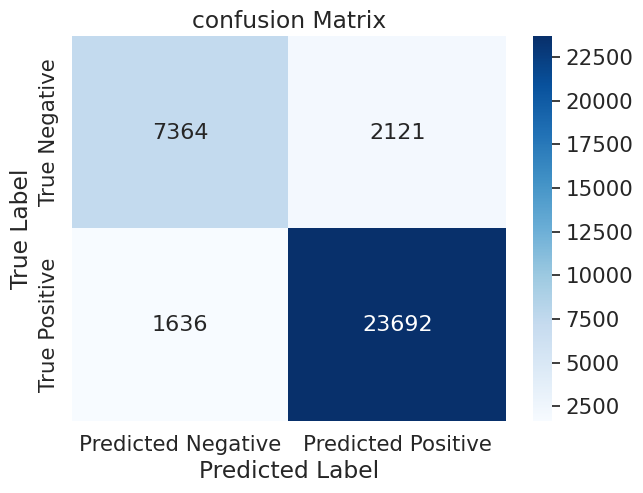

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
confusion = confusion_matrix(y_test, y_pred)
print("Confusion MAtrix:")
print(confusion)
sns.set(font_scale=1.4)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot= True, fmt = 'd',cmap = 'Blues', annot_kws = {'size':16},
            xticklabels = ['Predicted Negative', 'Predicted Positive'],
            yticklabels = ['True Negative', 'True Positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = hist_classifier.predict(X_test)
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [ ]:
print("AUC:", auc)

AUC: 0.8558956090192615


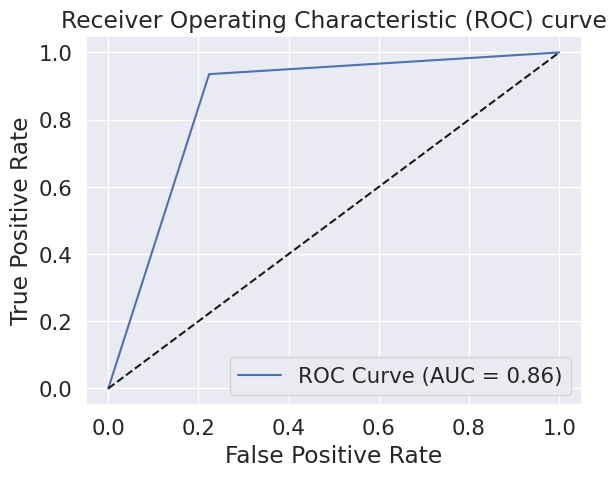

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label = 'ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import matthews_corrcoef

# Calculate the Matthew Correaltion Coeffient
mcc = matthews_corrcoef(y_test, y_pred)
print(("Matthew Correlation Coefficient(MCC):", mcc))

('Matthew Correlation Coefficient(MCC):', 0.7238211123140351)


In [ ]:

from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 200, criterion="entropy",class_weight='balanced',random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      9485
           1       0.91      0.94      0.92     25328

    accuracy                           0.89     34813
   macro avg       0.86      0.84      0.85     34813
weighted avg       0.88      0.89      0.88     34813



In [ ]:
pip install xgboost

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from xgboost import XGBClassifier
XG = XGBClassifier(n_estimators=100,random_state=48)
XG.fit(X_train, y_train)
y_pred_xg = XG.predict(X_test)

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y 

[12:12:17] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      9485
           1       0.91      0.94      0.92     25328

    accuracy                           0.89     34813
   macro avg       0.86      0.85      0.86     34813
weighted avg       0.89      0.89      0.89     34813



In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
confusion = confusion_matrix(y_test, y_pred)
print("Confusion MAtrix:")
print(confusion)
sns.set(font_scale=1.4)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot= True, fmt = 'd',cmap = 'Blues', annot_kws = {'size':16},
            xticklabels = ['Predicted Negative', 'Predicted Positive'],
            yticklabels = ['True Negative', 'True Positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('confusion Matrix')
plt.show()